# Preprocessing Data

In [1]:
#Load the necessary python libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,confusion_matrix,roc_curve,precision_recall_curve
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras import callbacks

In [2]:
df = pd.read_csv('Loan_Default.csv')
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.shape

(148670, 34)

In [5]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [7]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

Loan Default: 36639 and Not Defaulted: 112032

In [8]:
df.duplicated().sum()

0

In [9]:
#check null value
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

# Data Analysis and Visualization

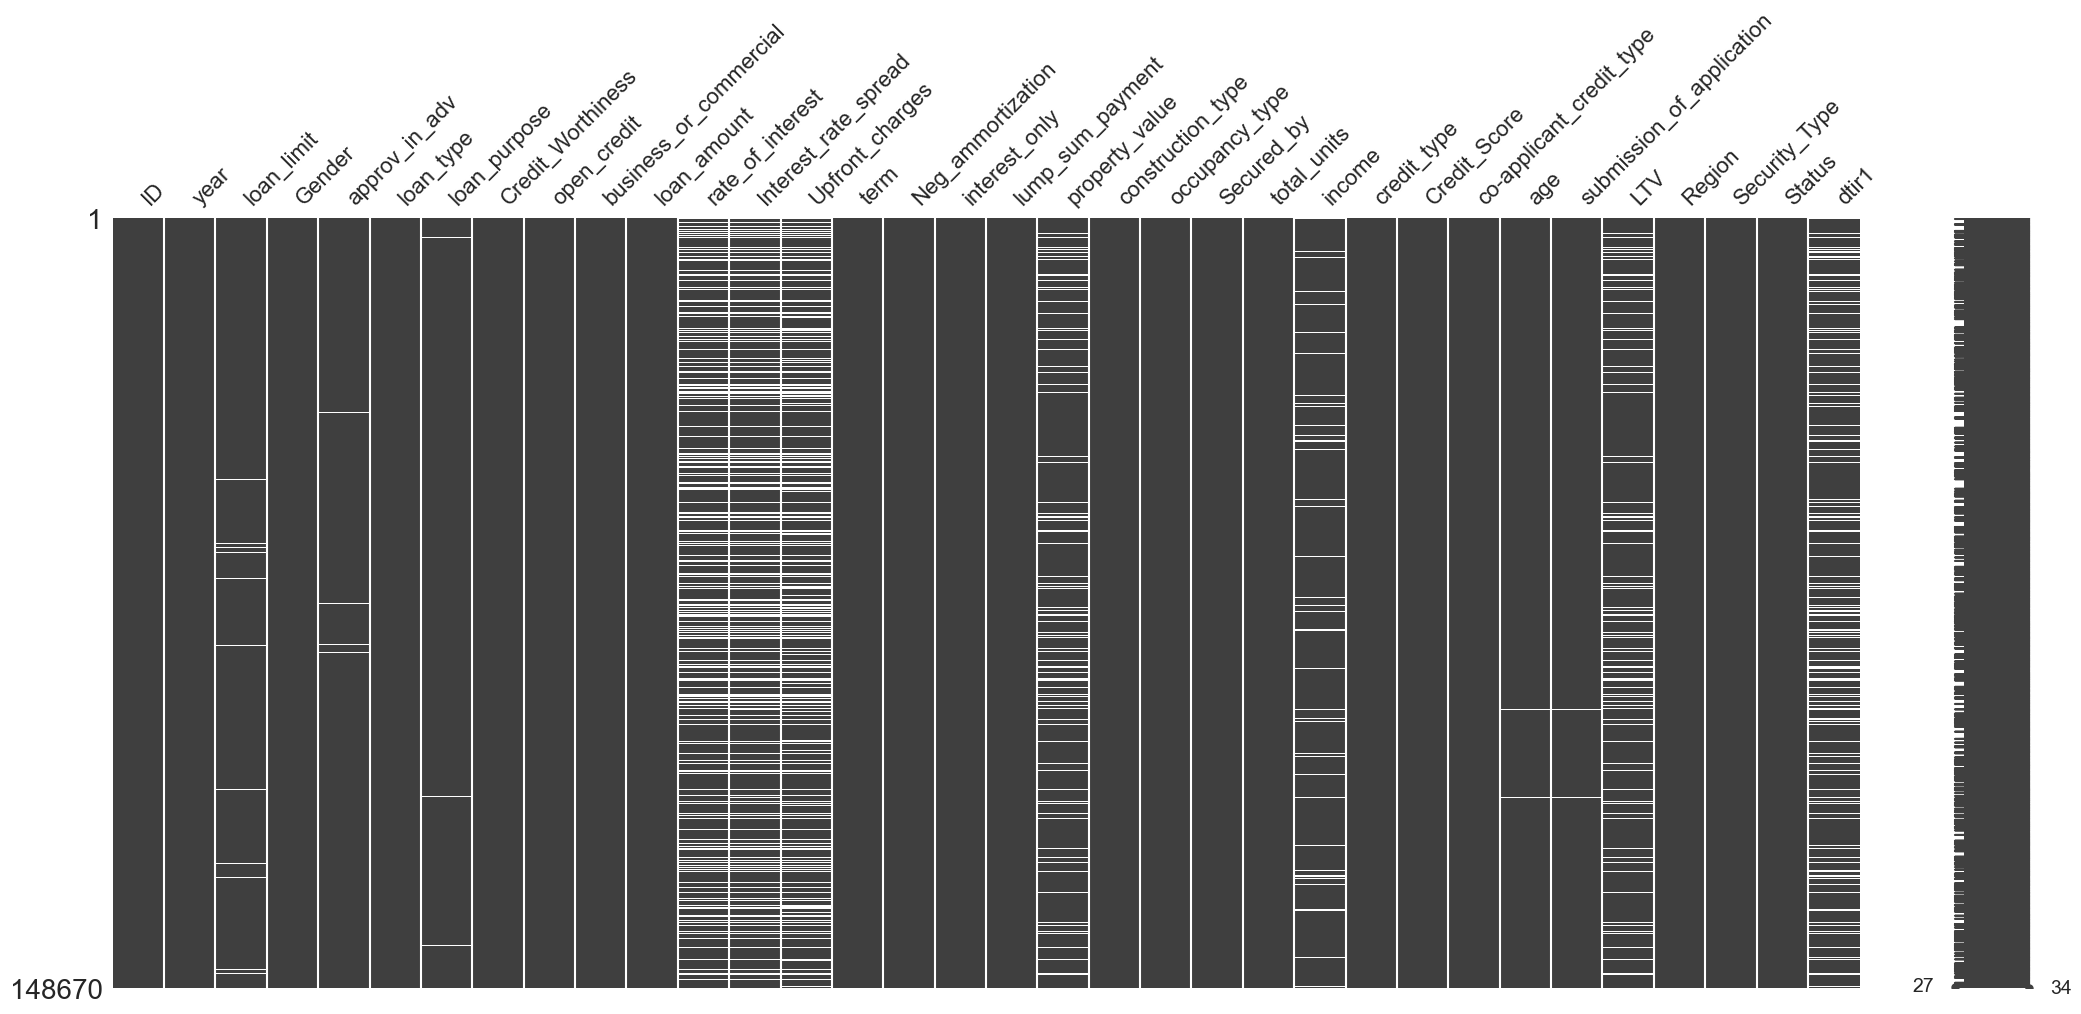

In [10]:
msno.matrix(df)
plt.show()

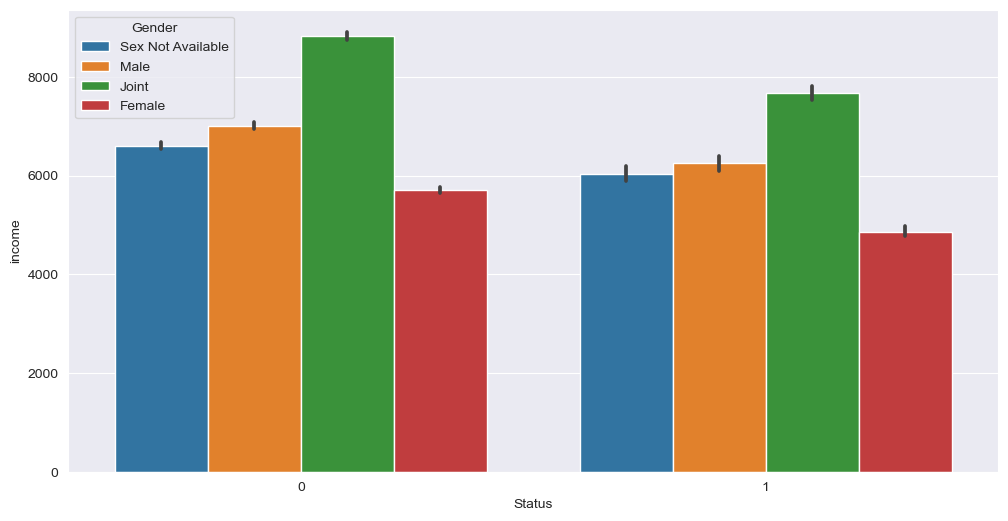

In [11]:
#checking if The Loan Defaulter is dependent on Gender
fig, ax = plt.subplots()
sns.barplot(data=df, x='Status', y='income',hue='Gender')
fig.set_size_inches([12,6])
plt.show()

In [12]:
df['Gender'].value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

As the visualize, Gender is not a factor to decide the Loan Defaulter since distribution of each gender is same in both sides.

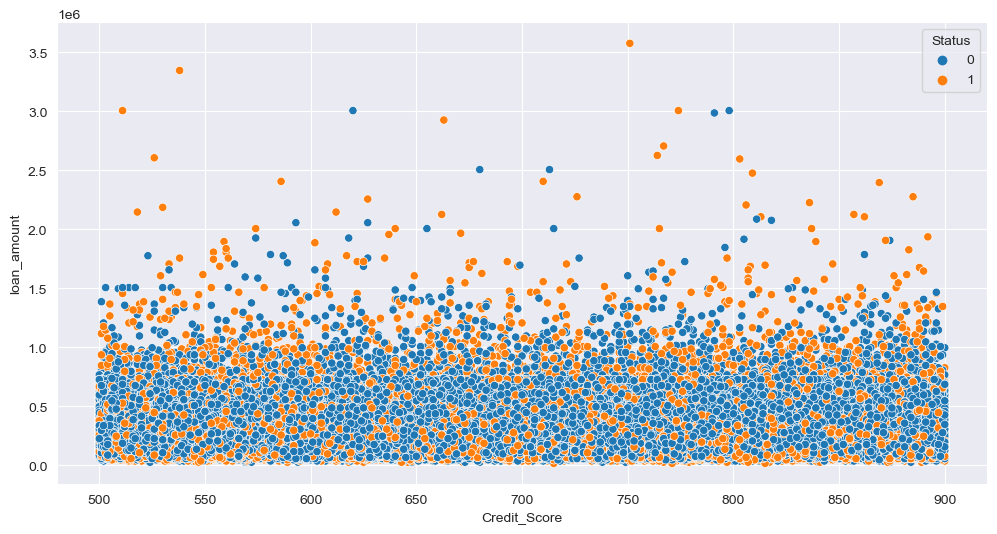

In [13]:
#How Loan Defaulter is related to Credit Score and Loan Amount
fig, ax = plt.subplots()
sns.scatterplot(x='Credit_Score', y = 'loan_amount', data=df, hue='Status')
fig.set_size_inches([12,6])
plt.show()

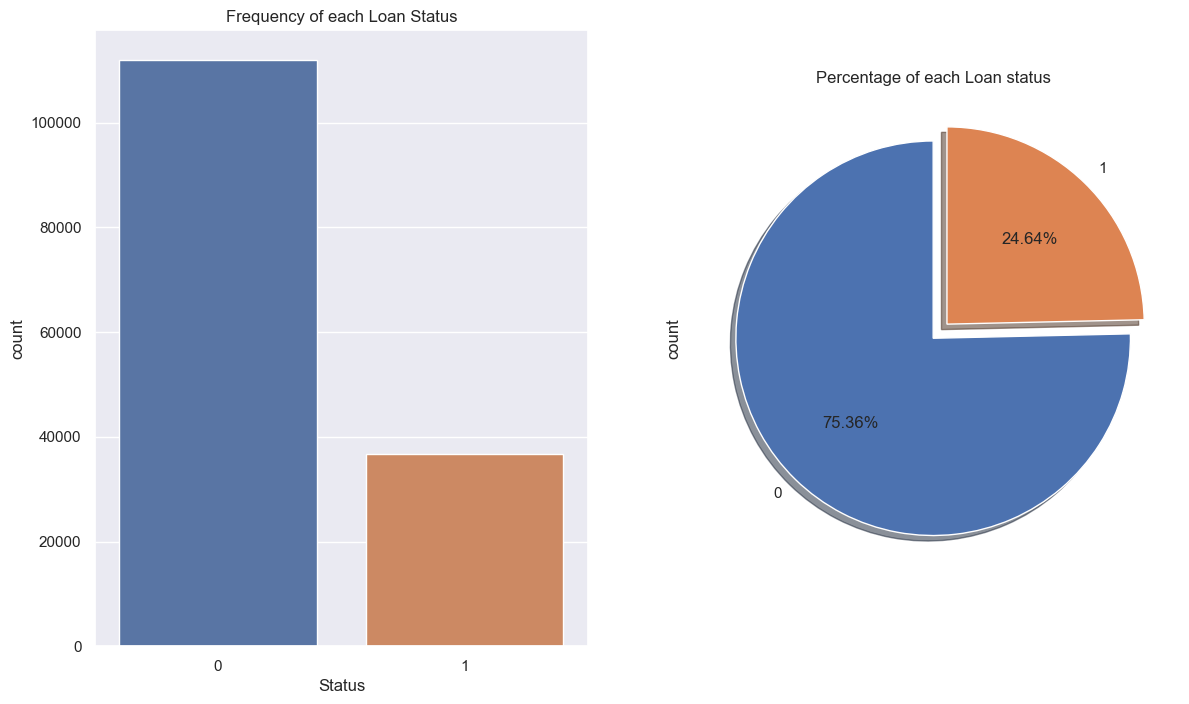

In [14]:
#Distribution of each status
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='Status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.Status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

Clearly, the number of Non-Defaulter is much higher than the number of Defaulter.
At least 3 times. This is a case of imbalanced class problem. We need to balancing this dataset. 

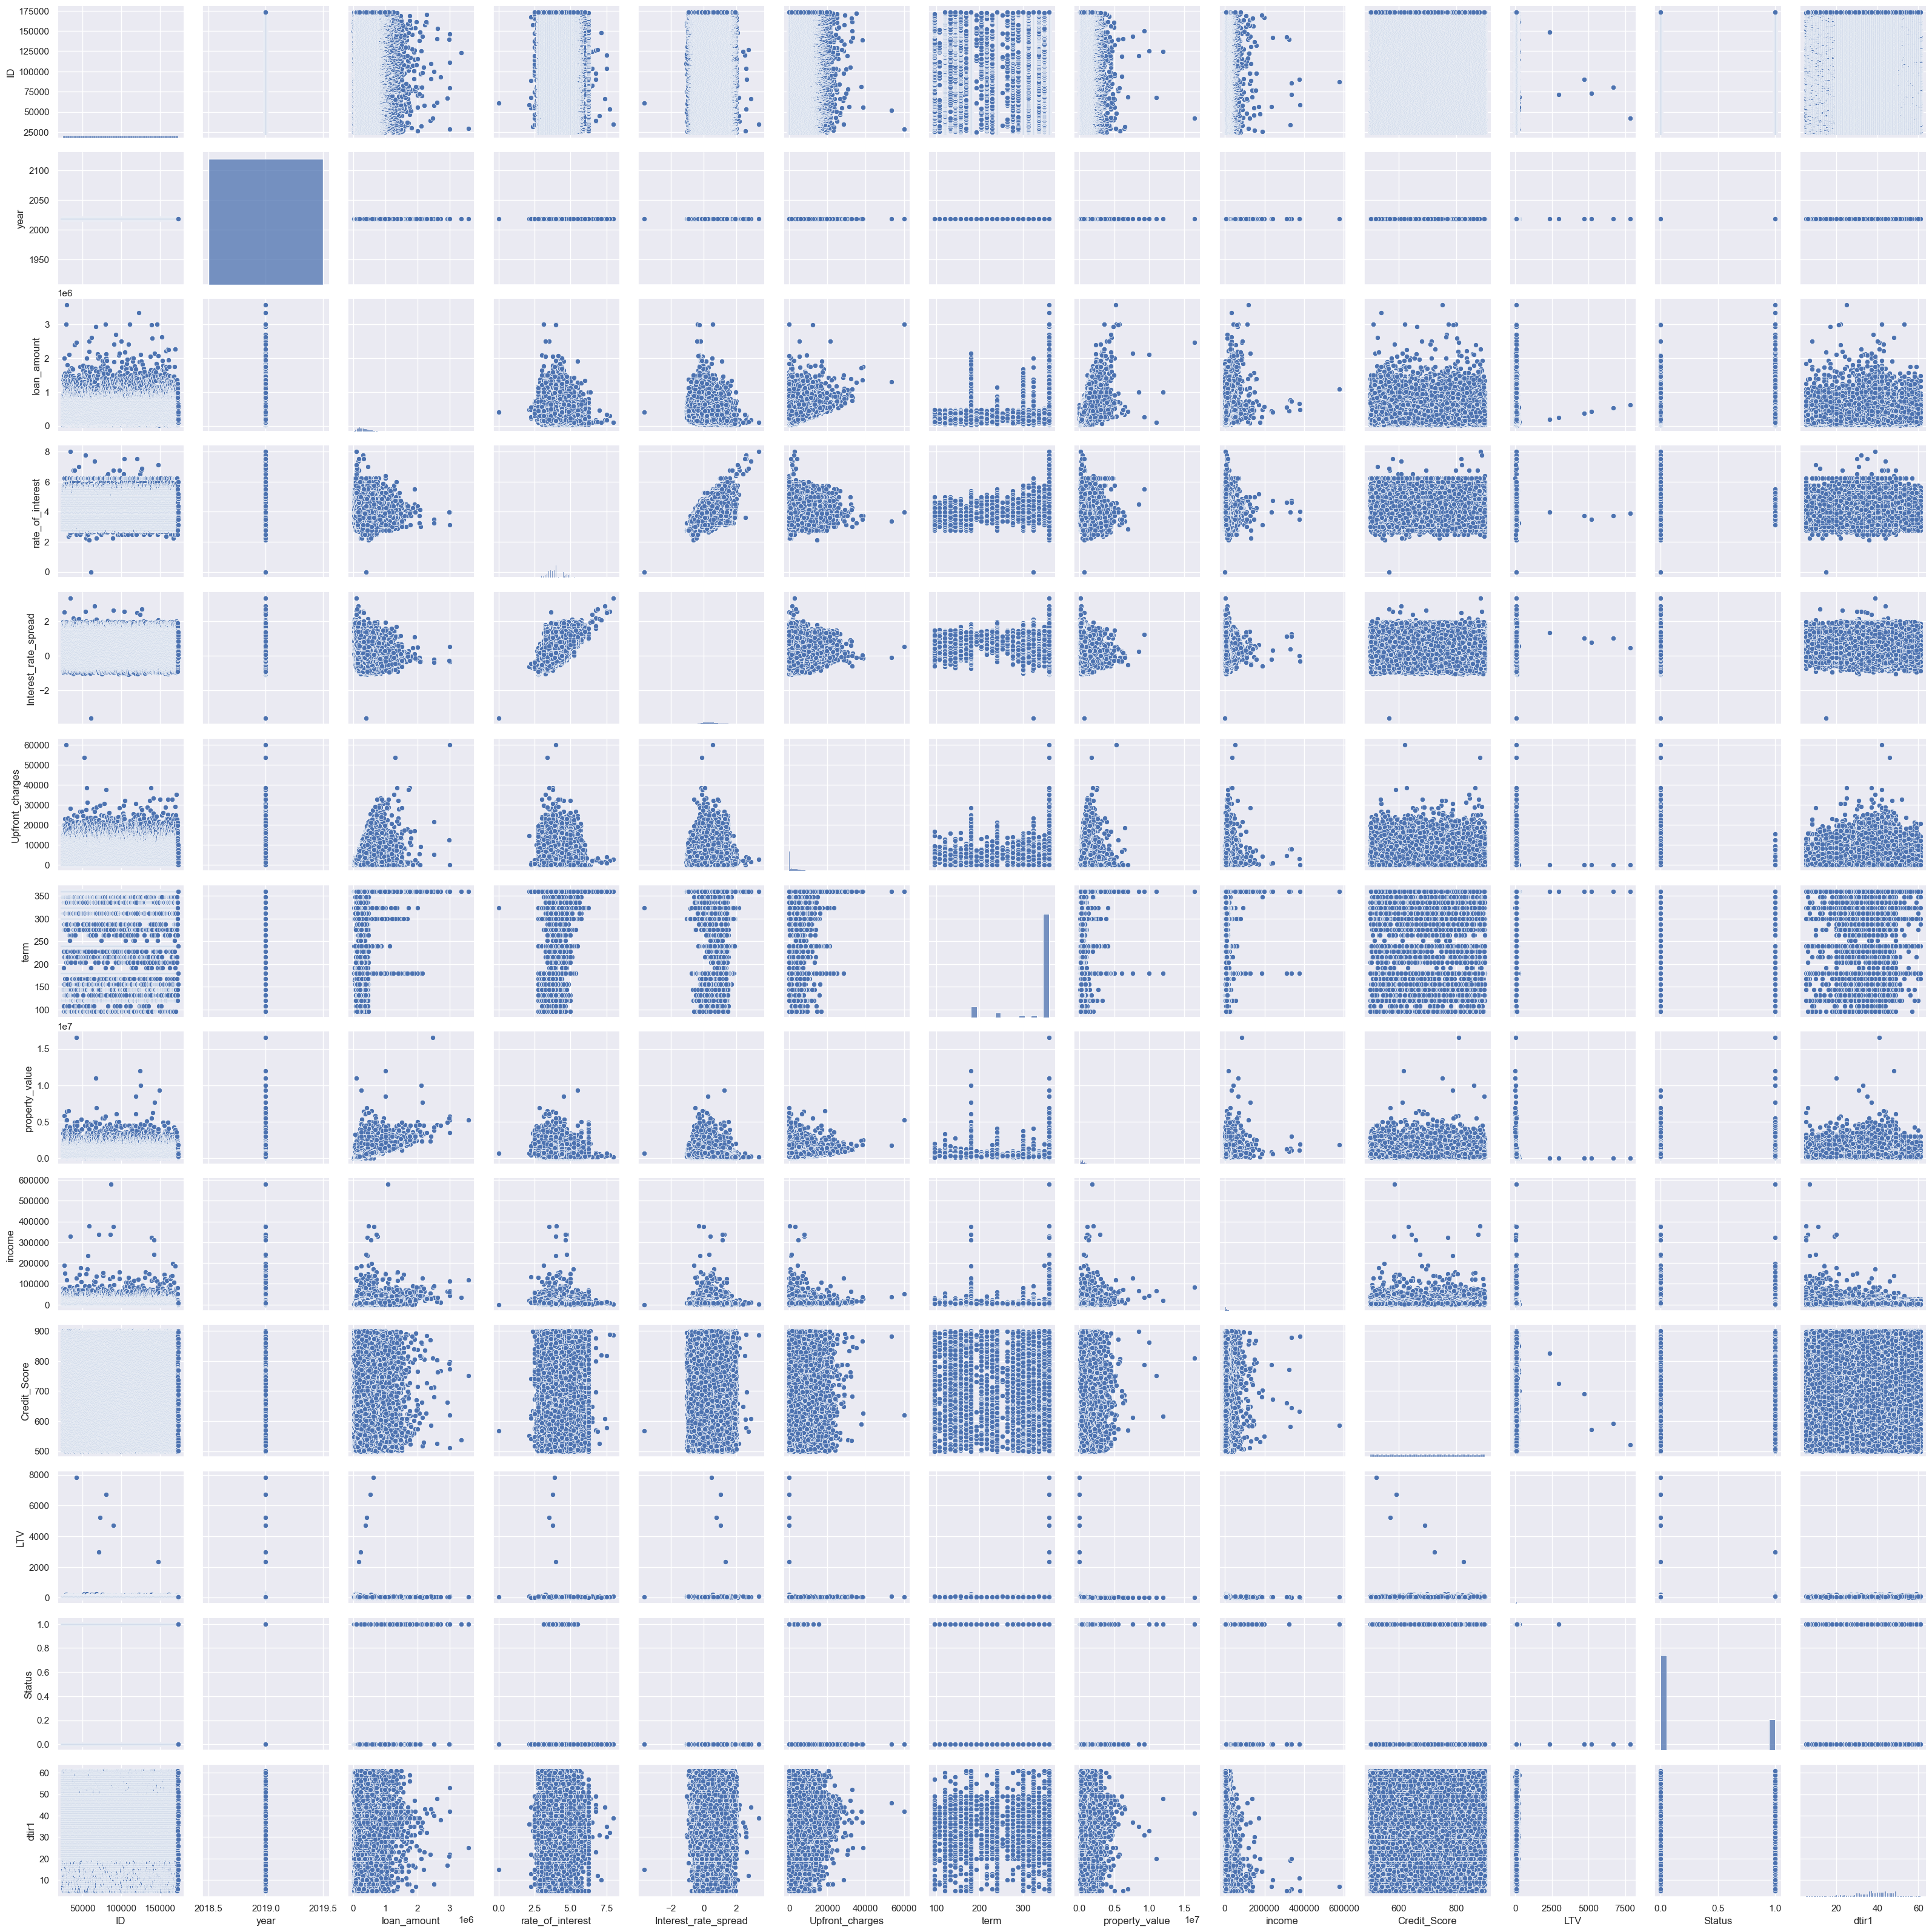

In [15]:
sns.pairplot(df)

<Axes: xlabel='loan_type', ylabel='count'>

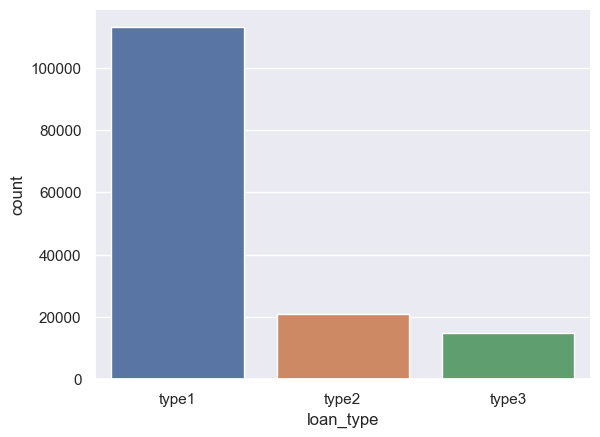

In [16]:
sns.countplot(data=df, x='loan_type')

<Axes: xlabel='Status', ylabel='count'>

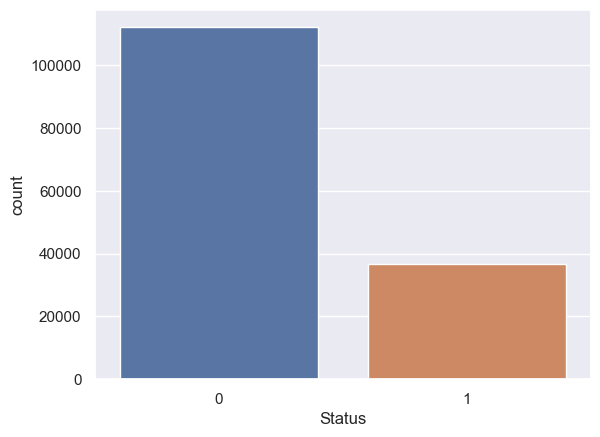

In [17]:
sns.countplot(data=df, x='Status')

<Axes: xlabel='age', ylabel='count'>

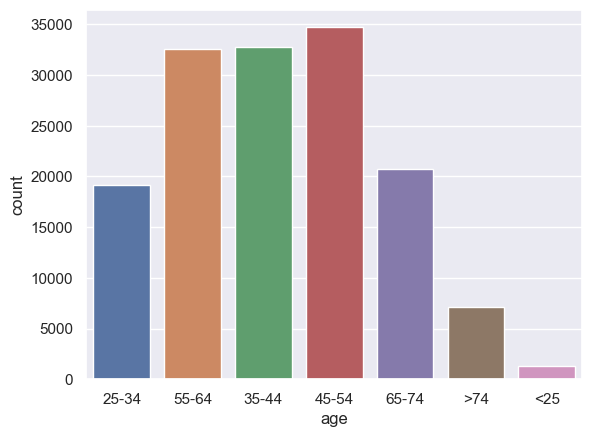

In [18]:
sns.countplot(data=df, x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

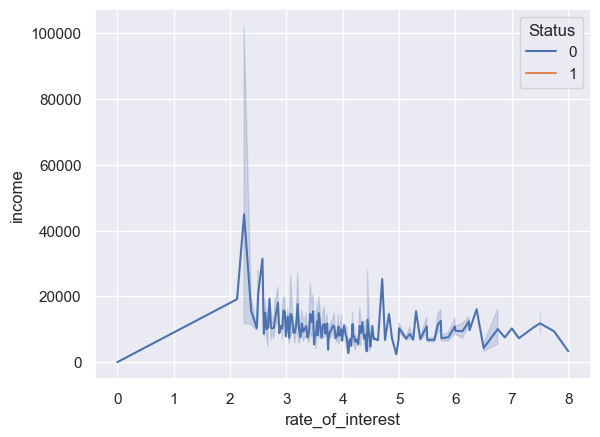

In [19]:
sns.lineplot(data=df, x='rate_of_interest', y='income',hue='Status')

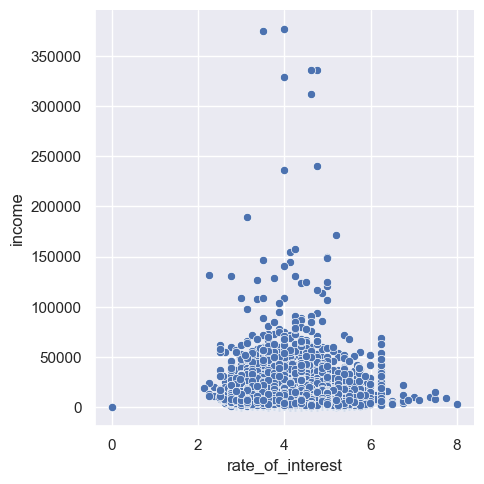

In [20]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

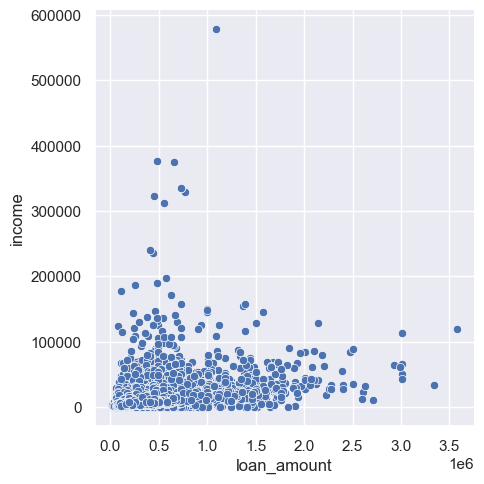

In [21]:
sns.relplot(x ="loan_amount", y ="income",data = df)

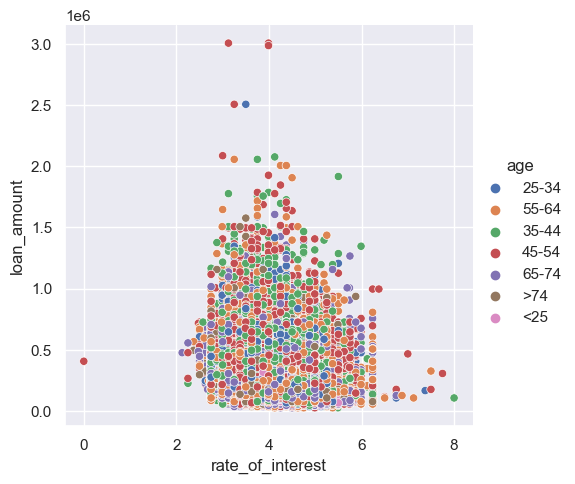

In [22]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

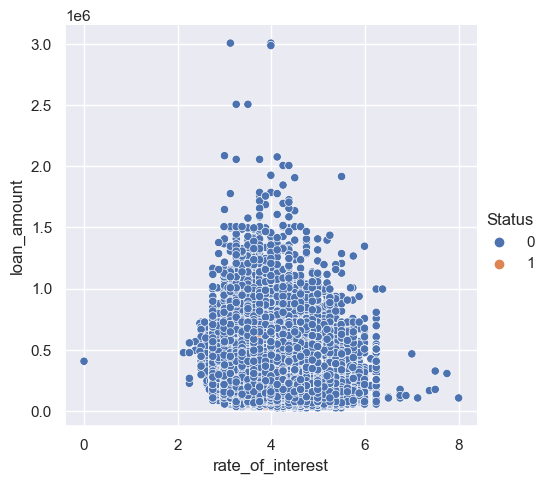

In [23]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='Status' ,data = df)

<Axes: xlabel='Status', ylabel='loan_amount'>

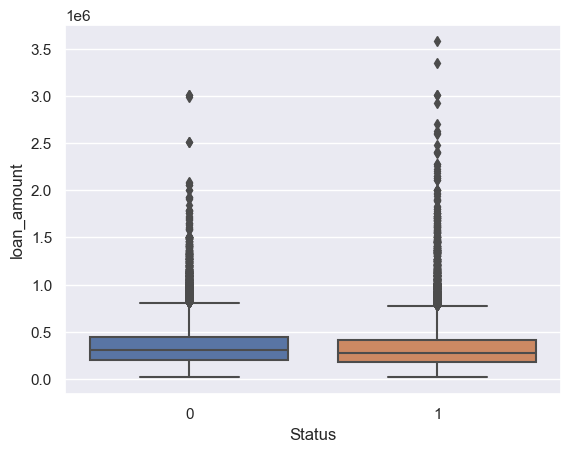

In [24]:
sns.boxplot(data=df , x='Status' , y ='loan_amount')

<Axes: xlabel='Status', ylabel='income'>

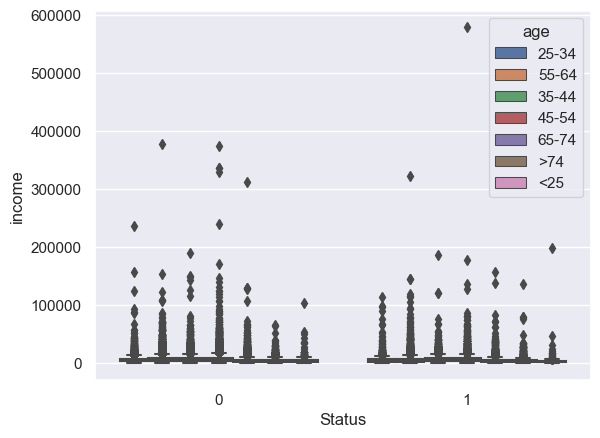

In [25]:
sns.boxplot(data=df , x='Status' , y ='income' , hue='age')

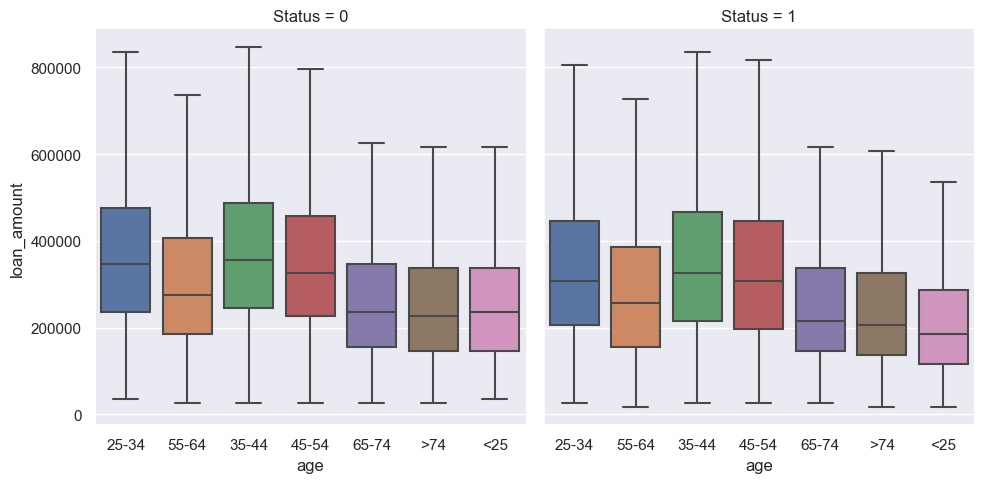

In [26]:
sns.catplot(data=df,x='age',y='loan_amount',kind='box',col='Status',sym="")

since feature year does not contribute to our target feature, so we can drop this feature

In [27]:
#droping year
df = df.drop('year' , axis = 1)

# Handle Missing Value

In [28]:
#checking null values
df.isna().sum()

ID                               0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [29]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [30]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(10)

Dataframe has 33 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Upfront_charges                39642               26.7
Interest_rate_spread           36639               24.6
rate_of_interest               36439               24.5
dtir1                          24121               16.2
property_value                 15098               10.2
LTV                            15098               10.2
income                          9150                6.2
loan_limit                      3344                2.2
approv_in_adv                    908                0.6
age                              200                0.1

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])


imputer = SimpleImputer(strategy='most_frequent')
df[['age' ,'loan_limit']] = imputer.fit_transform(df[['age' , 'loan_limit']])

In [32]:
df.dropna(inplace = True)

In [33]:
df.isna().sum()

ID                           0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

Label Encoding

In [34]:
#specify which columns have dtype is Object
objList = df.select_dtypes(include='object').columns 
print(objList)

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [35]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 147315 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         147315 non-null  int64  
 1   loan_limit                 147315 non-null  int32  
 2   Gender                     147315 non-null  int32  
 3   approv_in_adv              147315 non-null  int32  
 4   loan_type                  147315 non-null  int32  
 5   loan_purpose               147315 non-null  int32  
 6   Credit_Worthiness          147315 non-null  int32  
 7   open_credit                147315 non-null  int32  
 8   business_or_commercial     147315 non-null  int32  
 9   loan_amount                147315 non-null  int64  
 10  rate_of_interest           147315 non-null  float64
 11  Interest_rate_spread       147315 non-null  float64
 12  Upfront_charges            147315 non-null  float64
 13  term                       147315 

In [36]:
df.head()

ID  loan_limit  Gender  approv_in_adv  loan_type  loan_purpose  \
0  24890           0       3              0          0             0   
1  24891           0       2              0          1             0   
2  24892           0       2              1          0             0   
3  24893           0       2              0          0             3   
4  24894           0       1              1          0             0   

   Credit_Worthiness  open_credit  business_or_commercial  loan_amount  ...  \
0                  0            0                       1       116500  ...   
1                  0            0                       0       206500  ...   
2                  0            0                       1       406500  ...   
3                  0            0                       1       456500  ...   
4                  0            0                       1       696500  ...   

   credit_type  Credit_Score  co-applicant_credit_type  age  \
0            3           758                         0    0   
1            2           552                         1    3   
2            3           834                         0    1   
3            3           587                         0    2   
4            1           602                         1    0   

   submission_of_application        LTV  Region  Security_Type  Status  \
0                          1  98.728814       3              1       1   
1                          1  72.746457       0              1       1   
2                          1  80.019685       3              1       0   
3                          0  69.376900       0              1       0   
4                          0  91.886544       0              1       0   

       dtir1  
0  45.000000  
1  37.732932  
2  46.000000  
3  42.000000  
4  39.000000  

[5 rows x 33 columns]

Scaling the data

In [37]:
from sklearn.preprocessing import scale 
X_scaled = pd.DataFrame(scale(df.drop("Status", axis=1)))

In [38]:
X_scaled.head()

0         1         2         3         4         5         6   \
0 -1.731475 -0.266356  1.322529 -0.430908 -0.519288 -1.648031 -0.211787   
1 -1.731452 -0.266356  0.373707 -0.430908  1.019801 -1.648031 -0.211787   
2 -1.731428 -0.266356  0.373707  2.320682 -0.519288 -1.648031 -0.211787   
3 -1.731405 -0.266356  0.373707 -0.430908 -0.519288  0.976690 -0.211787   
4 -1.731382 -0.266356 -0.575116  2.320682 -0.519288 -1.648031 -0.211787   

         7         8         9   ...        22        23        24        25  \
0 -0.061384  0.401468 -1.169116  ... -0.827930  1.394649  0.502745 -0.997905   
1 -0.061384 -2.490858 -0.679480  ... -0.313822  0.557693 -1.275172  1.002100   
2 -0.061384  0.401468  0.408601  ...  0.400217  1.394649  1.158676 -0.997905   
3 -0.061384  0.401468  0.680621  ...  0.781037  1.394649 -0.973099 -0.997905   
4 -0.061384  0.401468  1.986318  ...  0.552545 -0.279264 -0.843639  1.002100   

         26        27        28        29        30        31  
0 -1.473552  0.741861  0.683792  1.091399  0.014969  0.752519  
1  0.499797  0.741861  0.000370 -0.974414  0.014969  0.000108  
2 -0.815769  0.741861  0.191680  1.091399  0.014969  0.856056  
3 -0.157986 -1.347961 -0.088260 -0.974414  0.014969  0.441908  
4 -1.473552 -1.347961  0.503817 -0.974414  0.014969  0.131297  

[5 rows x 32 columns]

In [47]:
X_scaled.to_csv('feature_data_scaled.csv',index=False)

In [48]:
df.to_csv('df_transformed.csv',index=False)